# Global Cybersecurity Threats (2015-2024)

In [176]:
# import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from scipy.cluster.hierarchy import dendrogram, linkage
%matplotlib inline

In [177]:
# Load the dataset
df = pd.read_csv('/content/drive/My Drive/Global_Cybersecurity_Threats_2015-2024.csv')

# Display dataset info
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

Dataset Shape: (3000, 10)

First 5 Rows:
   Country  Year        Attack Type     Target Industry  \
0    China  2019           Phishing           Education   
1    China  2019         Ransomware              Retail   
2    India  2017  Man-in-the-Middle                  IT   
3       UK  2024         Ransomware  Telecommunications   
4  Germany  2018  Man-in-the-Middle                  IT   

   Financial Loss (in Million $)  Number of Affected Users Attack Source  \
0                          80.53                    773169  Hacker Group   
1                          62.19                    295961  Hacker Group   
2                          38.65                    605895  Hacker Group   
3                          41.44                    659320  Nation-state   
4                          74.41                    810682       Insider   

  Security Vulnerability Type Defense Mechanism Used  \
0          Unpatched Software                    VPN   
1          Unpatched Software      

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB


In [179]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Country                                0
Year                                   0
Attack Type                            0
Target Industry                        0
Financial Loss (in Million $)          0
Number of Affected Users               0
Attack Source                          0
Security Vulnerability Type            0
Defense Mechanism Used                 0
Incident Resolution Time (in Hours)    0
dtype: int64


In [180]:
df.describe()

Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                              19.000000  
50%                              37.000000  
75%                              55.000000  
max                              72.000000

In [181]:
# Select only numeric colunmns before correlation
numeric_df = df.select_dtypes(include=['number'])

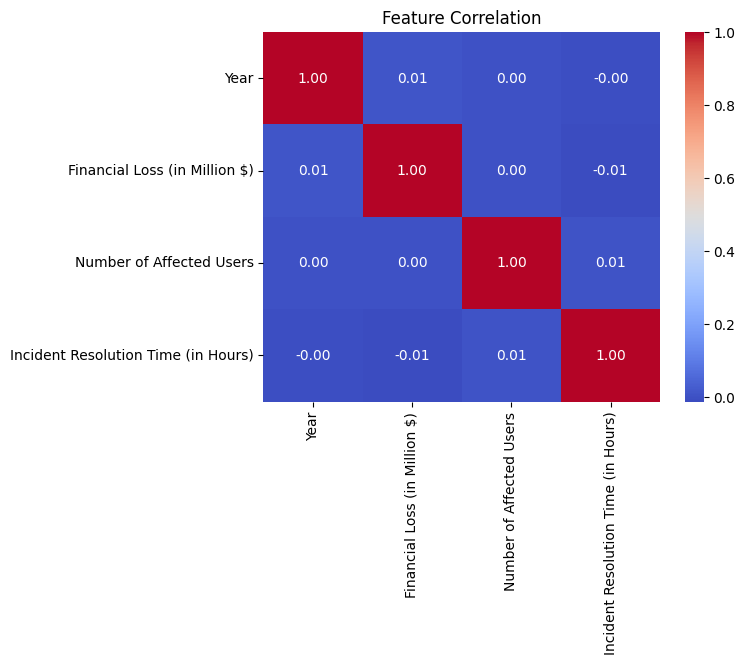

In [182]:
# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation')
plt.show()

The numerical data indicated no linear correlation

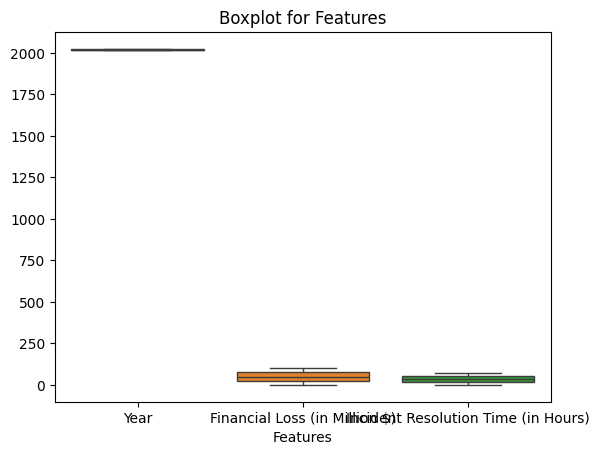

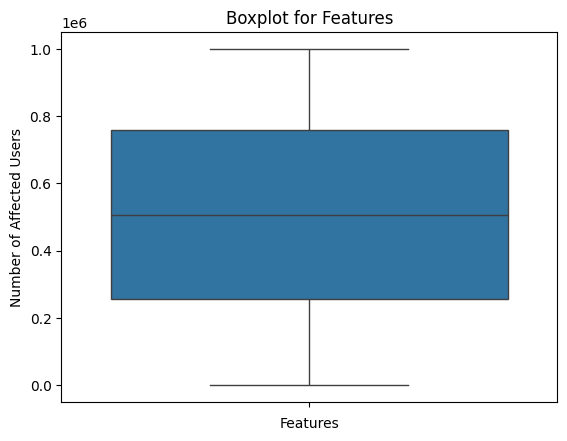

In [183]:
# Boxplot of Numeric Data
box_features = df.drop(['Number of Affected Users'], axis='columns')
sns.boxplot(data=box_features)
plt.title('Boxplot for Features')
plt.xlabel('Features')
plt.show()

sns.boxplot(data=df['Number of Affected Users'])
plt.title('Boxplot for Features')
plt.xlabel('Features')
plt.show()

No visible outliers

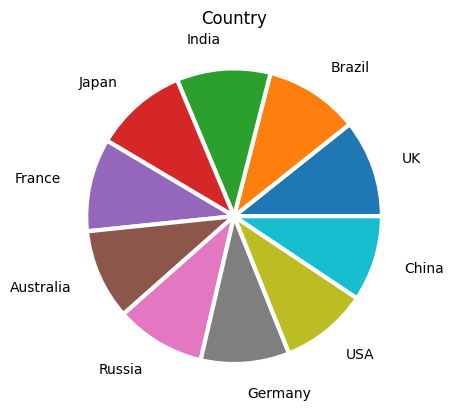

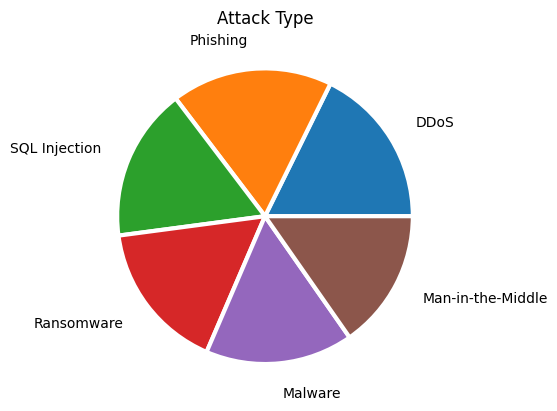

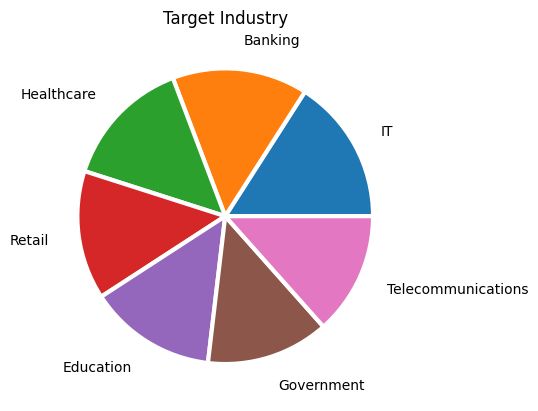

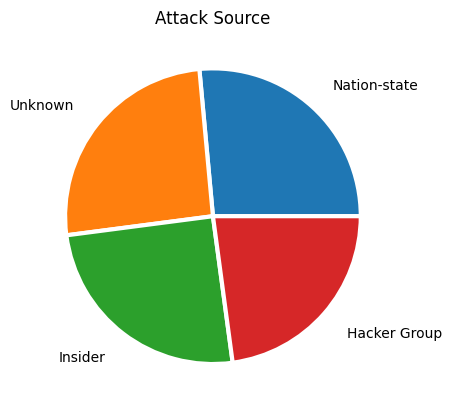

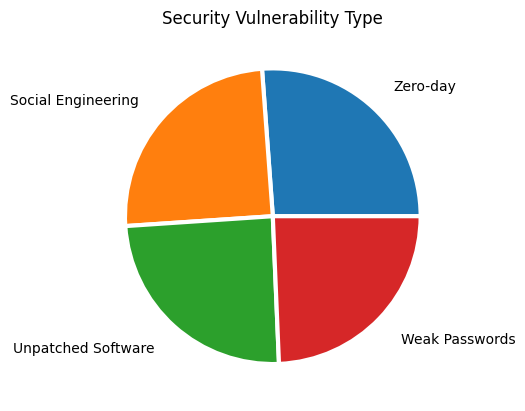

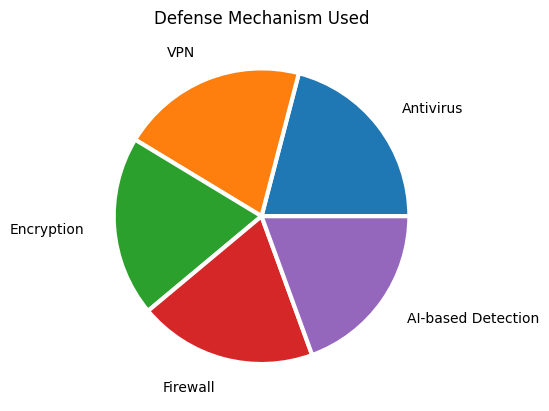

In [184]:
# Categorical Data

# Country
country_count = df['Country'].value_counts()
plt.pie(country_count.values, labels=country_count.index, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Country')
plt.show()

# Attack Type
attack_type_count = df['Attack Type'].value_counts()
plt.pie(attack_type_count.values, labels=attack_type_count.index, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Attack Type')
plt.show()

# Target Industry
target_industry_count = df['Target Industry'].value_counts()
plt.pie(target_industry_count.values, labels=target_industry_count.index, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Target Industry')
plt.show()

# Attack Source
attack_source_count = df['Attack Source'].value_counts()
plt.pie(attack_source_count.values, labels=attack_source_count.index, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Attack Source')
plt.show()

# Security Vulnerability Type
security_vulnerability_type_count = df['Security Vulnerability Type'].value_counts()
plt.pie(security_vulnerability_type_count.values, labels=security_vulnerability_type_count.index, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Security Vulnerability Type')
plt.show()

# Defense Mechanism Used
defense_mech_count = df['Defense Mechanism Used'].value_counts()
plt.pie(defense_mech_count.values, labels=defense_mech_count.index, labeldistance=1.2,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' })
plt.title('Defense Mechanism Used')
plt.show()



In [185]:
# Encoding Features
from sklearn.preprocessing import LabelEncoder
cat_col = ['Country','Attack Type','Target Industry', 'Attack Source', 'Security Vulnerability Type', 'Defense Mechanism Used' ]

le = LabelEncoder()

for col in cat_col:
  df[col] = le.fit_transform(df[col])

df.head()

Country  Year  Attack Type  Target Industry  Financial Loss (in Million $)  \
0        2  2019            3                1                          80.53   
1        2  2019            4                5                          62.19   
2        5  2017            2                4                          38.65   
3        8  2024            4                6                          41.44   
4        4  2018            2                4                          74.41   

   Number of Affected Users  Attack Source  Security Vulnerability Type  \
0                    773169              0                            1   
1                    295961              0                            1   
2                    605895              0                            2   
3                    659320              2                            0   
4                    810682              1                            0   

   Defense Mechanism Used  Incident Resolution Time (in Hours)  
0                       4                                   63  
1                       3                                   71  
2                       4                                   20  
3                       0                                    7  
4                       4                                   68

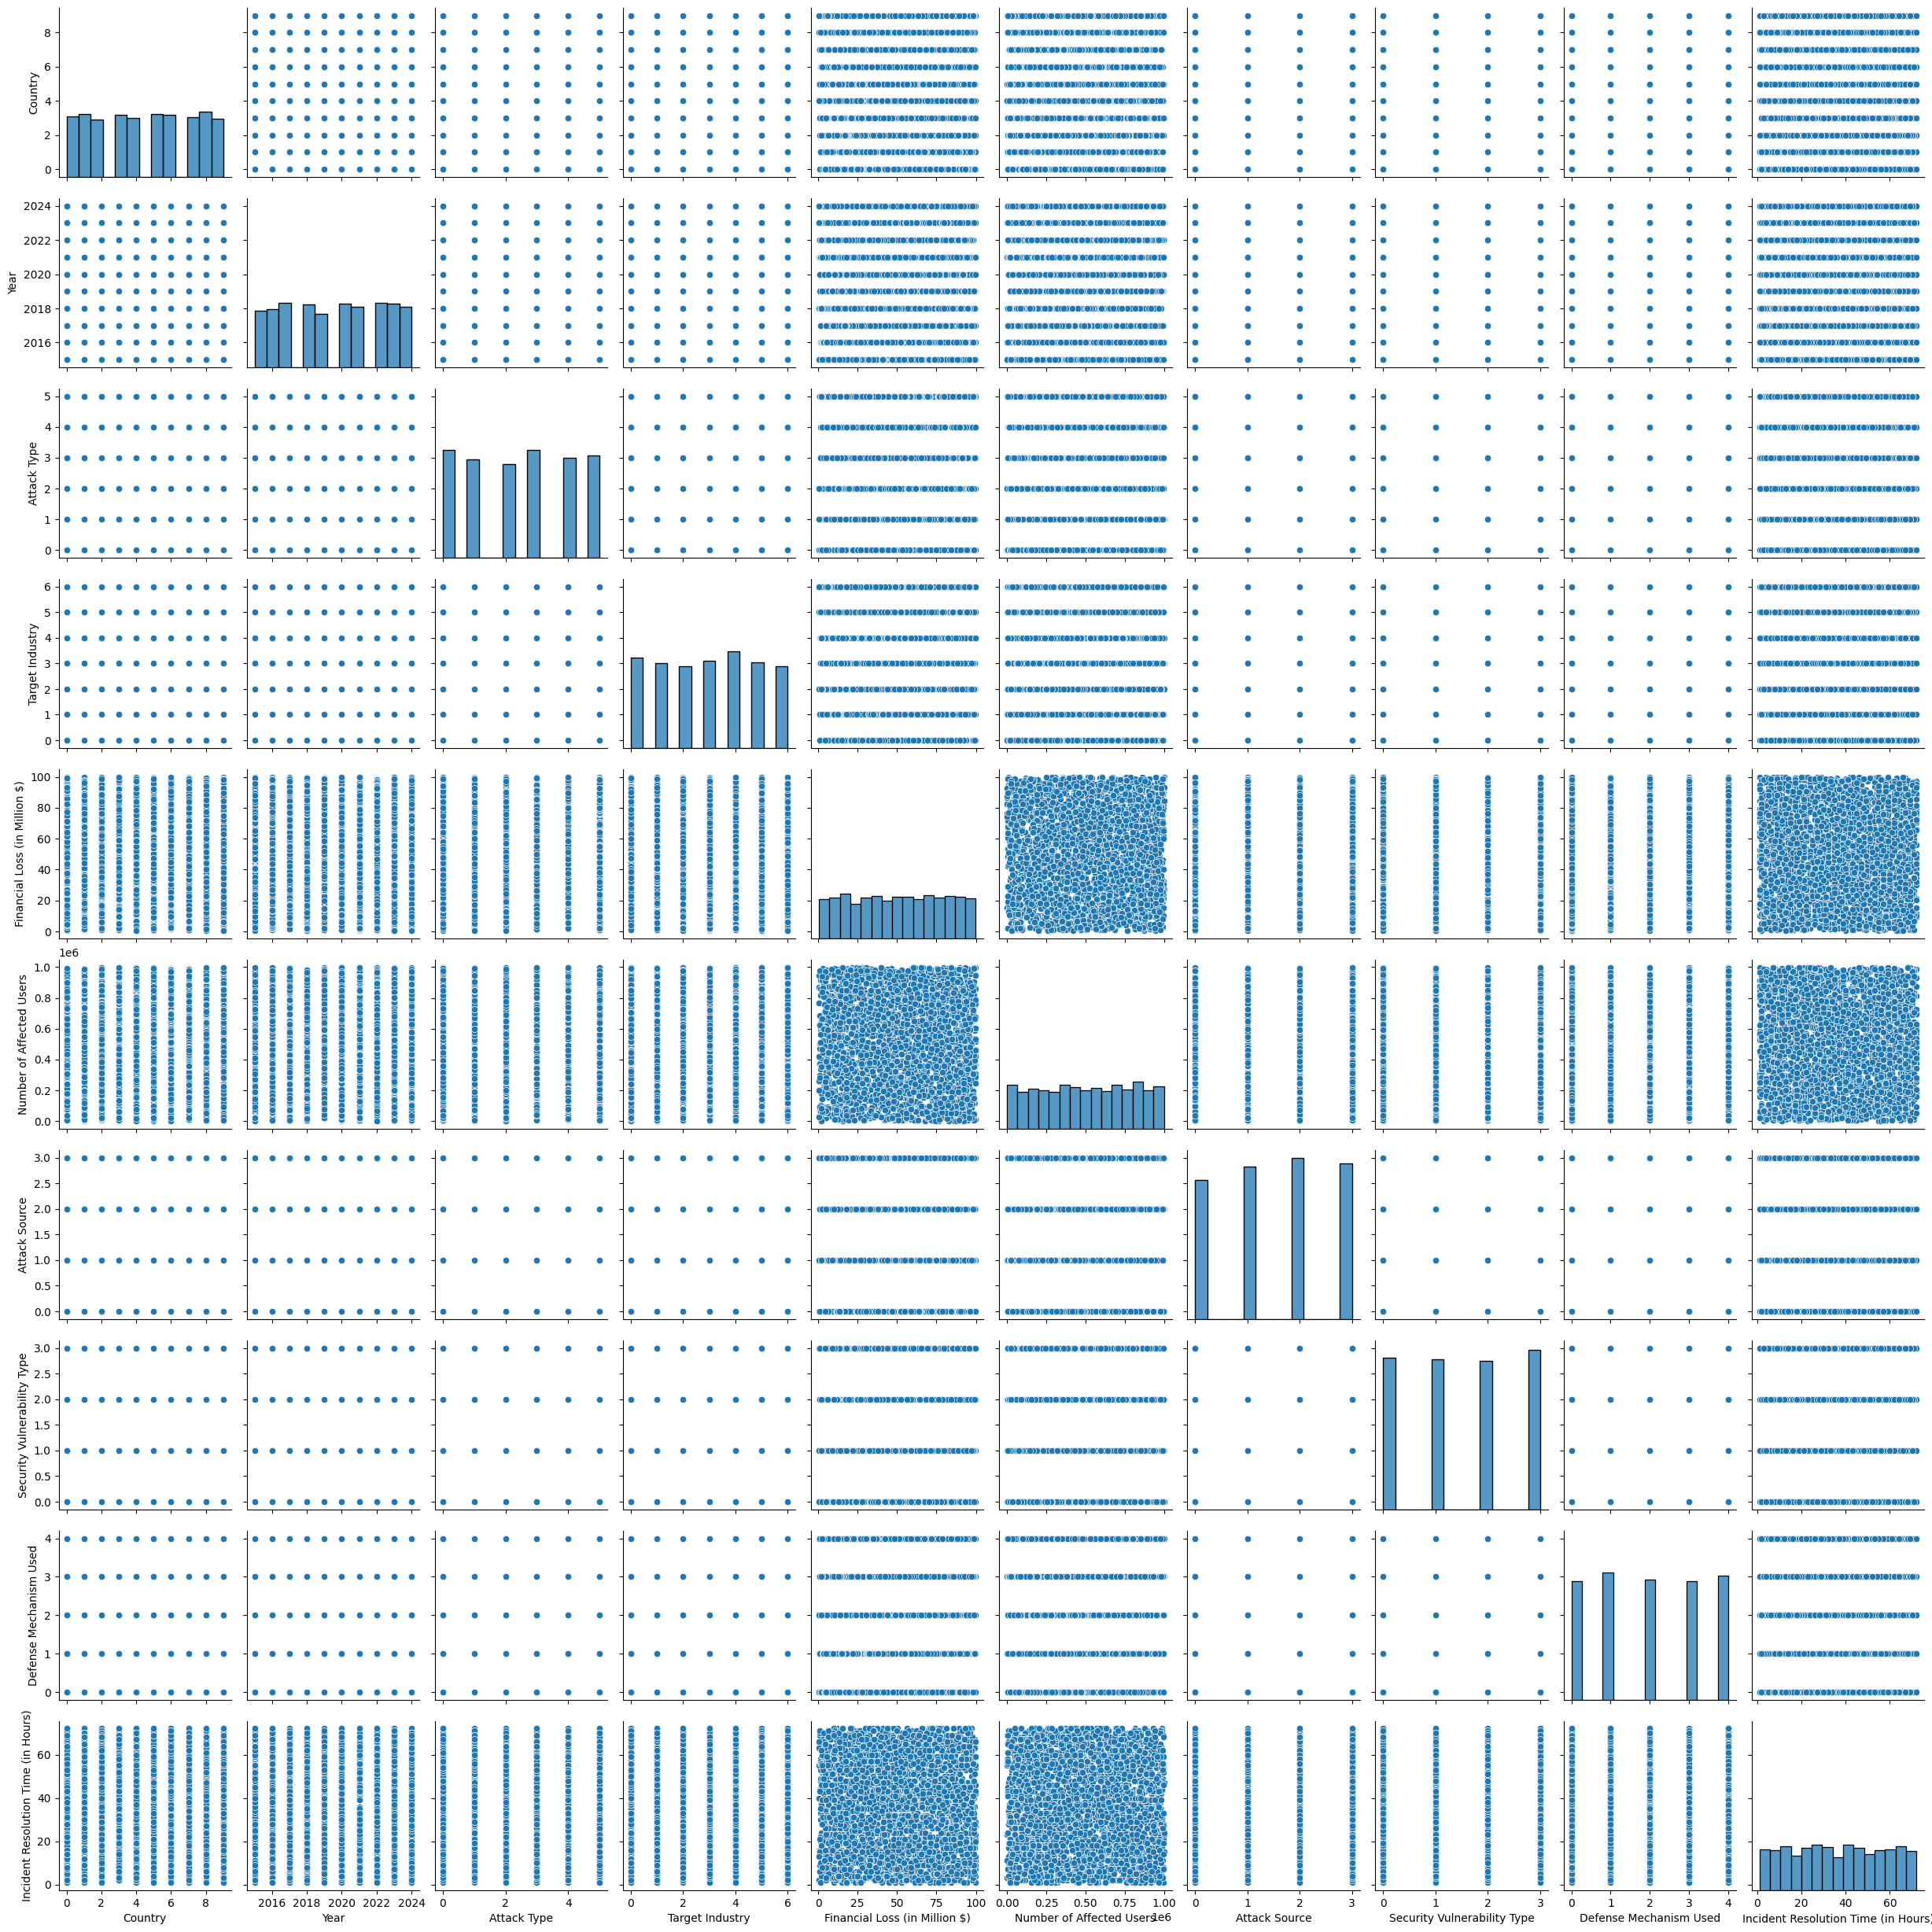

In [186]:
sns.pairplot(data=df)

In [187]:
# Selection of Features for clustering
X =  df[['Financial Loss (in Million $)', 'Incident Resolution Time (in Hours)', 'Defense Mechanism Used' ]]


In [188]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Clustering

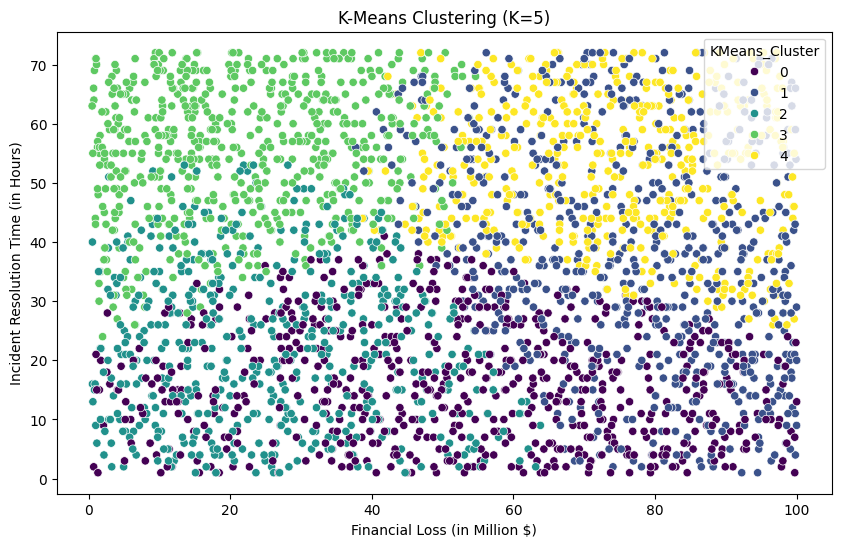

In [189]:
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Financial Loss (in Million $)', y='Incident Resolution Time (in Hours)', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (K=5)')
plt.show()

## Hierarchial Clustering

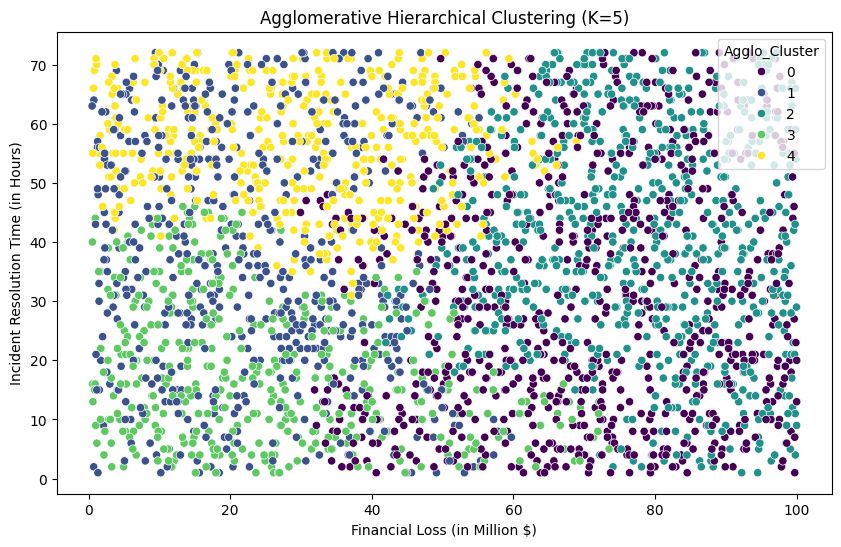

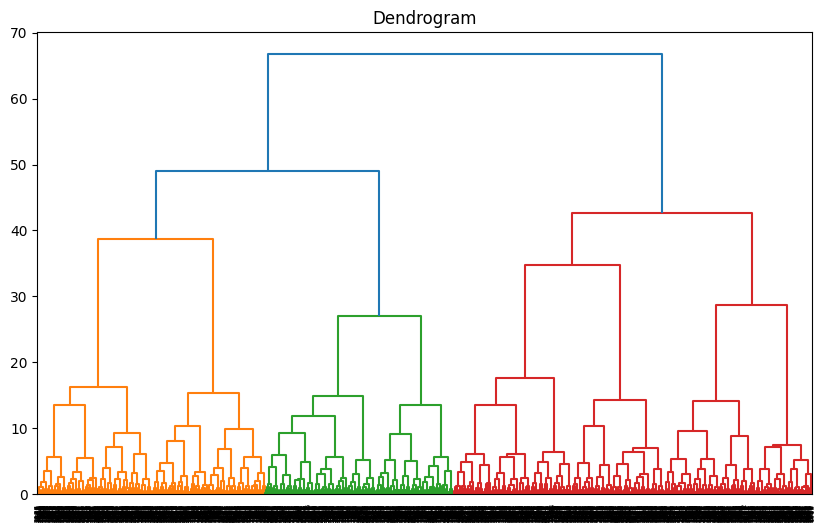

In [190]:
# Perform Agglomerative Hierarchical Clustering
agglo = AgglomerativeClustering(n_clusters=5)
df['Agglo_Cluster'] = agglo.fit_predict(X_scaled)

# Visualize Hierarchical Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Financial Loss (in Million $)', y='Incident Resolution Time (in Hours)', hue='Agglo_Cluster', data=df, palette='viridis')
plt.title('Agglomerative Hierarchical Clustering (K=5)')
plt.show()

# Dendrogram for Hierarchical Clustering
linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.show()

## DBSCAN

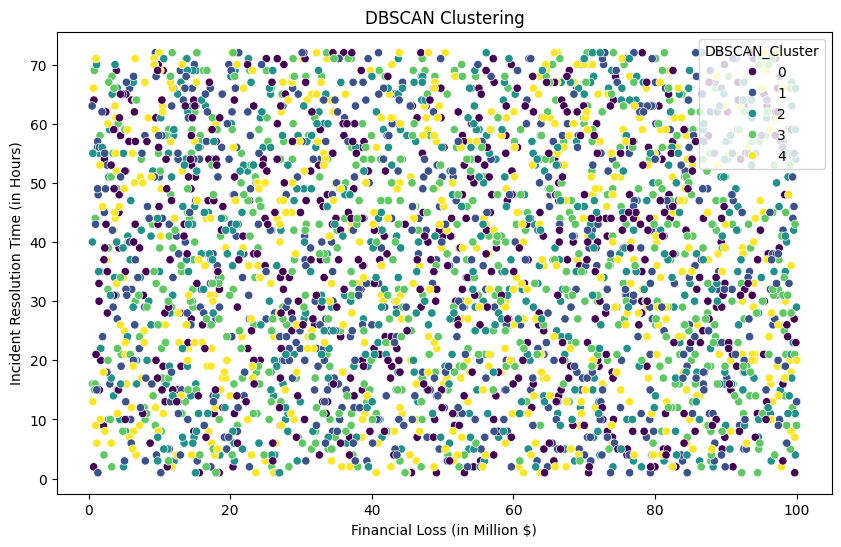

In [191]:
# Perform DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(X_scaled)

# Visualize DBSCAN Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Financial Loss (in Million $)', y='Incident Resolution Time (in Hours)', hue='DBSCAN_Cluster', data=df, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

## Evaluating Clustering Performance

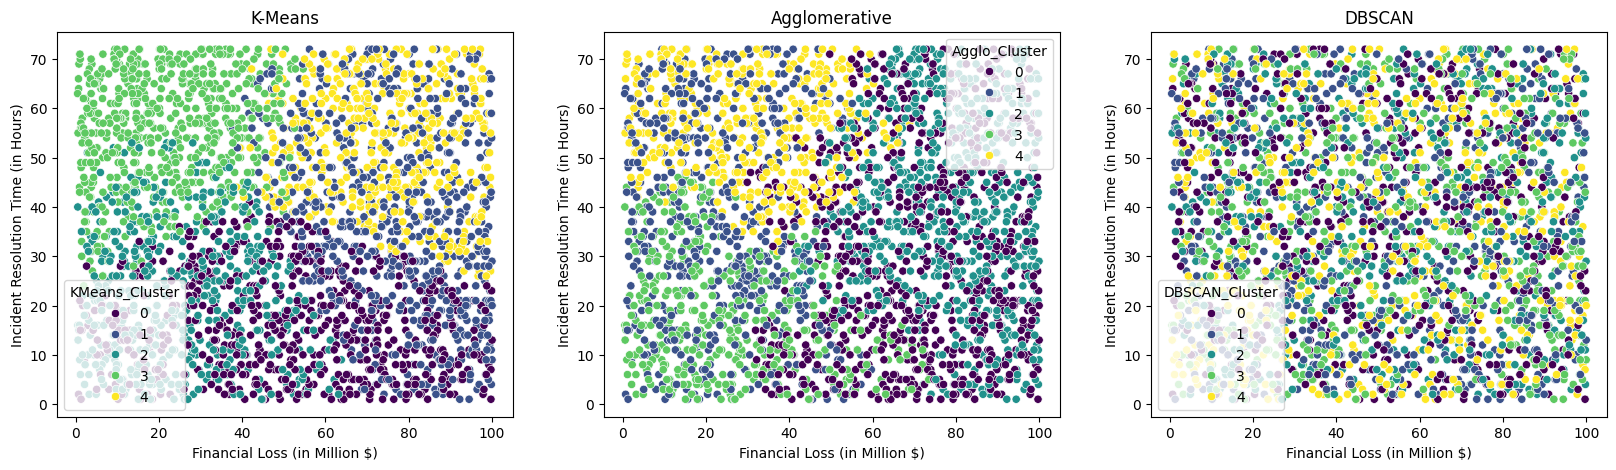

In [192]:
# Comparing the Clusters Visually
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(20,5))
ax1.set_title('K-Means')
ax2.set_title('Agglomerative')
ax3.set_title('DBSCAN')


# Visualize K-Means Clustering
sns.scatterplot(x='Financial Loss (in Million $)', y='Incident Resolution Time (in Hours)', hue='KMeans_Cluster', data=df, palette='viridis', ax=ax1)

# Visualize Agglomerative Hierarchical Clustering
sns.scatterplot(x='Financial Loss (in Million $)', y='Incident Resolution Time (in Hours)', hue='Agglo_Cluster', data=df, palette='viridis', ax=ax2)

# Visualize DBSCAN Clustering
sns.scatterplot(x='Financial Loss (in Million $)', y='Incident Resolution Time (in Hours)', hue='DBSCAN_Cluster', data=df, palette='viridis', ax=ax3)
plt.show()

### Sihouette Score

In [193]:
KMeans_SS = silhouette_score(X_scaled, kmeans.labels_)
Agglo_SS = silhouette_score(X_scaled, agglo.labels_)
DBSCAN_SS = silhouette_score(X_scaled, dbscan.labels_)
SS = [KMeans_SS, Agglo_SS, DBSCAN_SS]
print("\nK-Means Silhouette Score:", KMeans_SS )
print("Agglomerative Silhouette Score:", Agglo_SS )
print("DBSCAN Silhouette Score:", DBSCAN_SS )


K-Means Silhouette Score: 0.27337073899708314
Agglomerative Silhouette Score: 0.22737398879149817
DBSCAN Silhouette Score: 0.08505710659543604


### Calinski-Harabasz Index

In [194]:
KMeans_CHI = calinski_harabasz_score(X_scaled, kmeans.labels_)
Agglo_CHI = calinski_harabasz_score(X_scaled, agglo.labels_)
DBSCAN_CHI = calinski_harabasz_score(X_scaled, dbscan.labels_)
CHI = [KMeans_CHI, Agglo_CHI, DBSCAN_CHI]
print("\nK-Means Calinski-Harabasz Index:", KMeans_CHI )
print("Agglomerative Calinski-Harabasz Index:", Agglo_CHI )
print("DBSCAN Calinski-Harabasz Index:", DBSCAN_CHI )


K-Means Calinski-Harabasz Index: 1159.6832407156764
Agglomerative Calinski-Harabasz Index: 972.8599954853474
DBSCAN Calinski-Harabasz Index: 374.8767882787739


### Davis-Bouldin Index

In [195]:
KMeans_DBI = davies_bouldin_score(X_scaled, kmeans.labels_)
Agglo_DBI = davies_bouldin_score(X_scaled, agglo.labels_)
DBSCAN_DBI = davies_bouldin_score(X_scaled, dbscan.labels_)
DBI = [KMeans_DBI, Agglo_DBI, DBSCAN_DBI]
print("\nK-Means Davies-Bouldin Index:", KMeans_DBI)
print("Agglomerative Davies-Bouldin Index:", Agglo_DBI)
print("DBSCAN Davies-Bouldin Index:", DBSCAN_DBI)


K-Means Davies-Bouldin Index: 1.0502497572650433
Agglomerative Davies-Bouldin Index: 1.2534567873719804
DBSCAN Davies-Bouldin Index: 3.7527484622363487


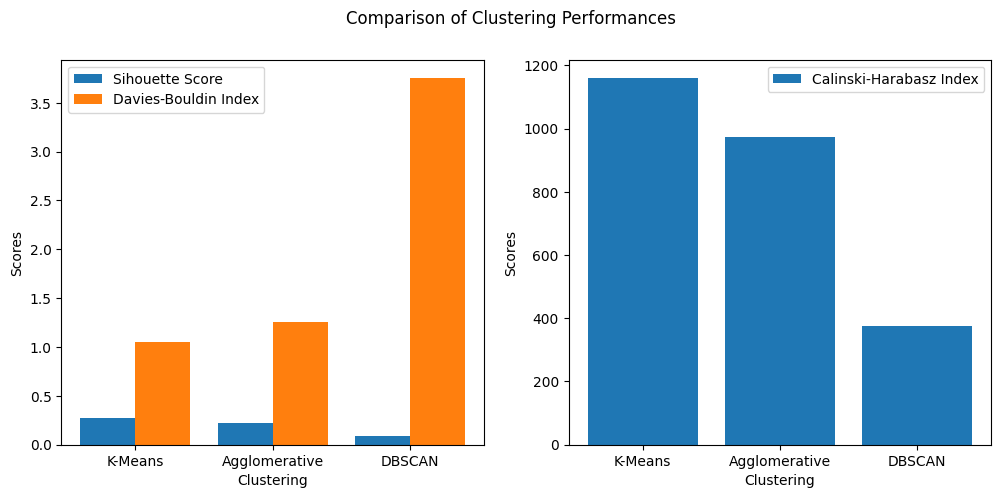

In [196]:
# Visual Comparison of Metrics
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
fig.suptitle('Comparison of Clustering Performances')

positions = np.arange(3)
bar_width = 0.4  # Reduced width to fit bars

# Plot bars with appropriate spacing
ax1.bar(positions - 0.5 * bar_width, SS, width=bar_width, label='Sihouette Score')
ax1.bar(positions + 0.5 * bar_width, DBI, width=bar_width, label='Davies-Bouldin Index')


ax2.bar(['K-Means', 'Agglomerative', 'DBSCAN'],CHI,label='Calinski-Harabasz Index')
# Adding labels and title
ax1.set_xlabel('Clustering')
ax2.set_xlabel('Clustering')
ax1.set_ylabel('Scores')
ax2.set_ylabel('Scores')


# Adding legend and xticks
ax1.legend()
ax2.legend()
ax1.set_xticks(positions, ['K-Means', 'Agglomerative', 'DBSCAN'])
ax2.set_xticks(positions, ['K-Means', 'Agglomerative', 'DBSCAN'])
plt.show()

The K-Means Clustering performance is the best of the three methods.

### Identifying the Optimal Number of Clusters

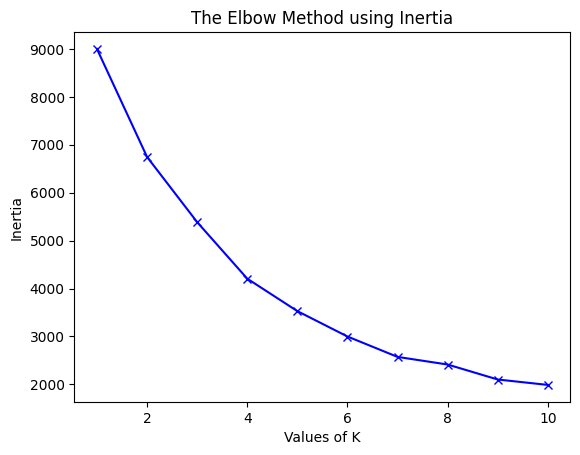

In [197]:
# The Elbow Method
inertias = []
for i in range(1, 11):
    km = KMeans(n_clusters=i).fit(X_scaled)
    inertias.append(km.inertia_)

plt.plot(range(1, 11), inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

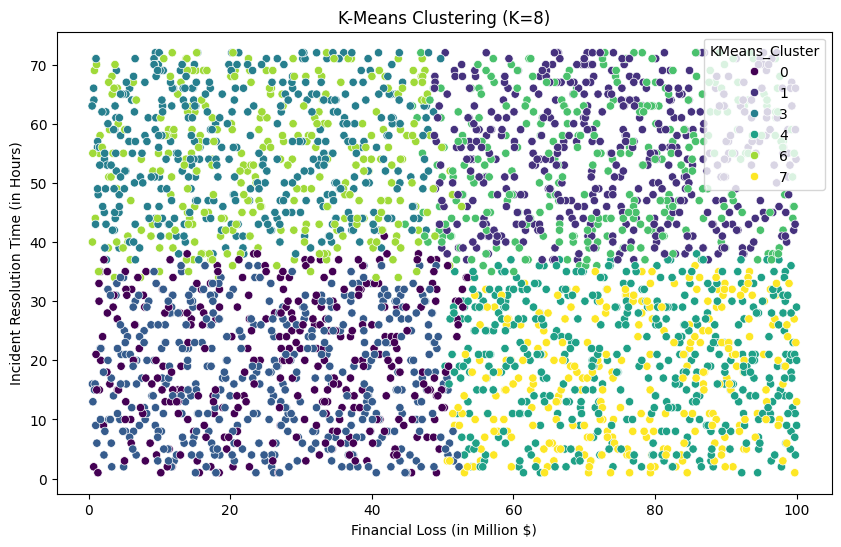


K-Means Silhouette Score: 0.28992470291677047

K-Means Calinski-Harabasz Index: 1309.6163155377765

K-Means Davies-Bouldin Index: 0.9617698348712326


In [198]:
# Number of clusters = 8
# Perform K-Means Clustering
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(X_scaled)
df['KMeans_Cluster'] = kmeans.labels_

# Visualize K-Means Clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Financial Loss (in Million $)', y='Incident Resolution Time (in Hours)', hue='KMeans_Cluster', data=df, palette='viridis')
plt.title('K-Means Clustering (K=8)')
plt.show()

# Evaluating K-Means Clustering Performance
print("\nK-Means Silhouette Score:", silhouette_score(X_scaled, kmeans.labels_))
print("\nK-Means Calinski-Harabasz Index:", calinski_harabasz_score(X_scaled, kmeans.labels_))
print("\nK-Means Davies-Bouldin Index:", davies_bouldin_score(X_scaled, kmeans.labels_))